# Introduction to web scraping with Python

## Content

- Hvad er web scraping?
    - Relevansen af web scraping
- Introduktion til internettet
    - Internettet og "webbet" (kort fortalt)
    - Hvordan virker internettet? (kort fortalt)
    - Hvad består hjemmesider af? (HTML)
- "Legaliteten" af web scraping
    - Web scraping og copyright
    - Web scraping og persondata
    - Web scraping og "hacking"
- Eksempel på web scraping med Python (mål for dagen)
- Kort introduktion til Python
    - Python sproget i Jupyter Notebook
    - Variable i Python
    - Pakker og Python funktionalitet
- Python og internettet
    - Internettet gennem Python (requests)
    - Klasser og attributter (response object)
- Naviger i HTML med Python
    - Kort introuktion til HTML
    - Intro til BeautifulSoup
    - Soup-klassen
    - Find HTML gennem tags og attributter
    - Python lister (find_all)
    - Naviger i HTML strukturen
- Øvelse: Hent overskrifter fra nyheder.tv2.dk

## What is web scraping?

"Web scraping" is an umbrella term for (mostly) automated techniques for collecting information from the web (usually refers to collection *not* done manually in a browser).

Crawling, scraping and spiders are all various forms of scraping. Programs/scripts written for scraping can also be refered to as robots.

Working with web scraping involves the collection of raw data from the web as well as handling and converting these data to a manageable and analyzable format.

### Why is web scraping relevant? (for the social sciences)

**1. The internet and web is a relevant field of study in itself**

The web is completely interwoven with our daily lives. Information on the web and our use of the web provide insight into habits, consumption and interaction.

**2. The internet and web is a data source**

The web is a massive collection of information. We need techniques for systematic collection of this information


This workshop focuses mostly on the web as a data source.

## A brief introduction to the internet

### The internet and the web (in a nutshell)

To be able to work with the web, we need some fundamental understanding of what the web and the internet actually are.

Terms like "the internet" and "the web" are often used interchangeably (especially in Danish where there is not really a term for "the web").  They do however refer to different parts of a larger infrastructure.

**The internet**: A global system of interconnected computers and servers.
- "Internet" is short for "interconnected network"

**(World Wide) Web (WWW)**: A collection of resources made available via the internet
- "The web" can be considered as the navigable and public parts of the internet

**IP**: Short for "internet protocol" - a unique address on the internet
- Every computer and server on the internet has a unique id in the form of an IP-address (fx 127.28.115.253)

**URL**: Unique and human readable addresses for servers on the internet 
- Short for "uniform ressource locators"

**Trafic on the internet**
- When accessing the internet via the web, other computers and servers are contacted for information
- The connections between IP-addresses and URL's are handled by DNS servers (DNS: Domain Name System)

<img src="img/internet.png" alt="opte" width="600"/>

*Opte Project 2005*

### How the web works (in a nutshell)

![dns](img/dns.png)

*wpbeginner.com*

*As a consequence of this there is not common "address book" of the web*

We are either dependent on existing scrapers (fx [the wayback machine](https://web.archive.org/)) or our own crawlers for collecting data on the web.

### Content on the web

- Source code (raw and rendered)
- Media files (pictures, videos, etc.)
- Dynamic content (fx JavaScript, Ajax)
- Content from other websites

[demonstrate network tool in browser]

## The "legality" of web scraping

### Web scraping and copyright

The information and material on company and organisation websites are owned by those companies and organisations. A lot of websites have terms of use that prohibit the use of scraping or automated methods of collection on their websites. This is partly due to the fact that one can create a website with scrapers that duplicate the content of other websites. Even though this may not be our intention with the scraping that we do, it will often be considered a violation of the website's terms.

### Web scraping and personal data

Data on social media are a particular grey area when it comes to personal data. Is data that people voluntarily make available on public social media profiles still their data? A website like Twitter for example clearly states that all data made available on their platform is to be considered public information. Even so, a case could still be made that the data is still personal; just publicly available personal data.

Websites like Facebook, Twitter and Instagram also have terms of use for their data as they are responsible for it. Facebook and Instagram do for exmaple not allow any forms of automated collection of data.

### Web scraping og "hacking"

A website is located on a server. Each time a website is visited, a server is receiving a request to be processed. The more requests, the more busy the server is. Python allows us to easily write commands that send an incredible amount of requests within very short time.

*This can easily be considered an attack and an attempt to congest a server which is illegal!*

## Eksempel på web scraping med Python

In [11]:
import pandas as pd
import spacy
import string
from spacy.tokenizer import Tokenizer

from bs4 import BeautifulSoup as bs
import requests

import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

nlp = spacy.load("da_core_news_sm")

(-0.5, 399.5, 199.5, -0.5)

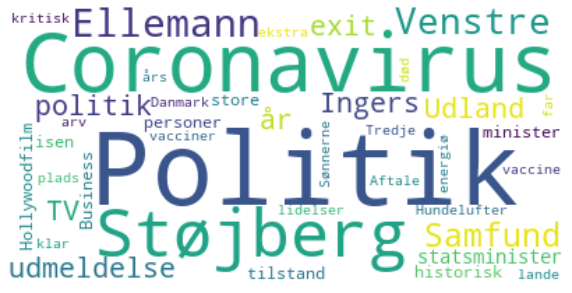

In [12]:
url_content = requests.get("https://nyheder.tv2.dk/").content

tv2_soup = bs(url_content)
texts = tv2_soup.find_all("a", class_ = "o-teaser_link")
texts = [text.get_text() for text in texts]
text = ''.join(texts)

doc = nlp(text)
words = []

tokenizer = Tokenizer(nlp.vocab)
pos_tag = ['PROPN', 'ADJ', 'NOUN']
stopwords = list(nlp.Defaults.stop_words) + ["LIVE"]
punctuation = string.punctuation + "”"

for token in doc:
    if(token.text in stopwords or token.text in punctuation):
        continue

    if(token.pos_ in pos_tag):
        words.append(token.text)
        
counts = pd.Series(words).value_counts()
counts = counts[counts > 1]

wc = WordCloud(background_color="white")
wc.fit_words(counts)

plt.figure(figsize=(10,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

## A brief introduction to Python

Python is a **general purpose** programming language. This means that it is developed with an emphasis on being compatible with a wide variety of tasks. Web scraping is one of the many things that we can use Python for.

The main component of a programming language (and Python) is an **interpreter**. An "interpreter" in a programming language **evaluates** commands (tries to understand commands written in a certain language) and produces some **output** dependent on the commands. The interpreter either understands the command or throws an error.

Python is also an **object-oriented** programming language. This means that writing Python code involves the continous creation of "objects" (or "variables"). "Obejcts" are basically containers for some kind of information to be refered to later. This means that objects can be pretty much anything from single digits, texts and URL's to collections of websites, datasets and so on.

Python differentiates between objects via the object's **class** and **type**. Each object in Python is a certain class that contains certain **attributes** and **methods**. 

One works and manipulates objects in Python via the use of **functions** and **methods**.

Python is **open-source** meaning that anyone can develop functions or classes for Python. Other functions and classes can be imported via **"packages"**.

### Using the Python language (in Jupyter Notebook)

When running Python code in a code cell in Jupyter Notebook, the code is evaluated. If the code is "understood", some output is produced. If not, Python throws an error.

In [2]:
print(42 + 50) # Valid Python command

92


In [3]:
bake_cake() # Invalid Python command - produces error

NameError: name 'bake_cake' is not defined

### Objects/variables in Python

Objects/variables are assigned using `=` with the object name to the left and the content to the right.

In [4]:
a = 42
b = 90
c = "hello"

When objects are assigned they can be called and used later in the code:

In [5]:
print(a)

42


In [7]:
print(a + b)

132


In [10]:
print(c, "there")

hello there


Using an object does not change the object. An object can usually only be changed through re-assignment:

In [11]:
print(a + 2) # Printing the result of a + 2
print(a) # a is still 42

44
42


## Functions in Python

Functions in Python follow this standard syntax: `functionname(arguement1, arguement2, ...)`

That is: function name followed by parenthesis with the input arguement separated by commas.

**"Arguements"** are the input for a function. A function can have any number of arguements from 0 to a lot. Valid arguements depend on the function. Standard arguements are usually some kind of input: some object that the function has to do something with.

Most functions also contain "keyword arguements": `functionname(arguement1, arguement2, keywordarguement1 = True)`

**"Keyword arguements"** can be considered the options of a function. Usually they accept the values `True` or `False` (for turning the option on or off) or accept a limited number of predefined text inputs.

`print` is a function taking various text-coercible objects as arguement and prints them out

In [14]:
print("hello", "there")

hello there


`print` has the keyword arguement `sep` deciding what should separate the input objects. The standard is a white space " " but it can be changed.

In [16]:
print("hello", "there", sep = ", ")

hello, there


### Packages and Python funktionality

Additional functions can be imported in Python via packages. 

Fx Python does not know the value of pi by default:

In [17]:
print(pi)

NameError: name 'pi' is not defined

However, the value of pi is contained in the package `math` which can be imported into Python

In [18]:
import math

print(math.pi)

3.141592653589793


When importing, one can use abbreviations:

In [19]:
import math as m

print(m.pi)

3.141592653589793


If only specific parts of a package is to be used, those specific elements can be imported:

In [21]:
from math import pi

print(pi)

3.141592653589793


## Python and the internet

When we access the web via a browser, the browser is doing a lot of work that we may not be aware of. 

All websites consist of some source code (usually HTML). Our browser renders this source code and displays a human-readable website with text formatting, images, links interactable elements and so on.

When accessing websites in Python, we are getting the raw source code.

### Accessing the internet with Python using `requests`

The package `requests` is used to send requests to a website in Python (access the website).

In the code below, we import the package `requests` and the send a "get" request to [https://nyheder.tv2.dk/](https://nyheder.tv2.dk/) using the function `requests.get` (when accessing a URL in a browser, our browser is also sending get requests). The request is stored in the object `response`.

In [26]:
import requests

response = requests.get('https://nyheder.tv2.dk/')

Note that no output is given as we are only asking for the object to be stored.

### Classes and attributes (with examples using the response object)

As mentioned, objects are always a certain class and type. Classes are associated with various methods and attributes that can be accessed using `.[attributename]` or `.[methodname]` (excluding the `[]`).

The object `response` is a `Response` class. We can see this using the function `type()`:

In [27]:
type(response)

requests.models.Response

When sending a `get` requests to a website, the server we are contacting returns various kinds of information including the status code for the request, whether the request was successful, the so-called "headers" used for sending the request, the website content and so on.

All this information is stored in various attributes in the object.

#### Checking the request

To check if the request was successful, we can check the status code by inspecting the attribute `.status_code`:

In [28]:
response.status_code

200

Status code 200 means "OK"; that our request was succesul. 

This can be verified by checking the attribute `.reason`:

In [31]:
response.reason

'OK'

**Quick note on status codes**

- Status codes beginning with 2 or 3: The request is successful
- Status codes beginning with 4: The request has failed (client-side, fx 404 when specifying a URL that does not exist on a given domain).
- Status codes beginning with 5: The request has failed (server-side)

Status codes can be used in code to check whether or not a site is reached before scraping.

#### Content of a webpage

The raw source code from a webpage can be extracted from the attribute `.content`.

In [30]:
content = response.content
print(content[0:1000]) # Printing first 1000 characters

b'<!DOCTYPE html>\n<html lang="da-DK" class="site-nyheder">\n<head>\n\n  <meta charset="utf-8"/>\n  <meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n\n  <meta name="viewport" content="width=device-width,initial-scale=1.0"/>\n  <meta name="msapplication-TileImage" content="https://shared.tv2.dk/sites/all/themes/t2/img/apple-touch-icon-precomposed.png"/>\n  <meta name="msapplication-TileColor" content="#fff"/>\n  <meta name="format-detection" content="telephone=no"/>\n  <link rel="apple-touch-icon-precomposed" href="https://shared.tv2.dk/sites/all/themes/t2/img/apple-touch-icon-precomposed.png"/>\n  <link rel="shortcut icon" href="https://shared.tv2.dk/favicon.ico" />\n\n  <!-- inline base CSS -->\n  <style type="text/css" media="screen">\n    @charset "UTF-8";@font-face{font-family:AlrightSansLT-Regular;src:url(https://shared.tv2.dk/sites/all/themes/t2/fonts/AlrightSansLT-Regular.woff2) format("woff2"),url(https://shared.tv2.dk/sites/all/themes/t2/fonts/AlrightSansLT-Regular.woff

With this raw source code, one *could* process this as is using something like regular expression to find the relevant parts of the source code.

However, HTML has a certain structure. This can be utilized to extract specific information from a webpage.

## Navigating HTML with Python

Most websites are build with HTML source code. [https://nyheder.tv2.dk/](https://nyheder.tv2.dk/) is no exception as can be seen in the printed content above.

In order to collect the relevant information from a website, we need to parse the HTML. 

HTML has a certain logic and structure that can be utilized to extract specific elements. Python has different packages for doing this. In this workshop we will be using the package `BeautifulSoup` ([https://www.crummy.com/software/BeautifulSoup/bs4/doc/](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)).

### A short introduction to HTML

HTML is short for "Hyper-Text Markup Language". It is used on webpages to give the pages their structure.

HTML is structured in "tags" denoted by `<>` and `</>`. The tags denote what kind of content it is. `<p>` is for example a paragraph tag. A piece of HTML like: `<p> This is a paragraph </p>` will render the sentence "This is a paragraph" as a paragraph. Common tags include `h1` for headings (and `h2`, `h3` and so on), `a` for links and `div` for a "division" or "section".

HTML is structured in a tree-like structure. Tags are therefore usually located within other tags. Tags on the same level are refered to as "siblings", tags inside other tags are refered to as "children" and tags outside other tags are refered to as "parents".

HTML uses "attributes" to both differentiate between the same type of tags and to add other variables/information to the tag. The `id` attribute is fx used to give several tags a common id. `class` is used to differentiate between different tags and provide them with different stylings. A common and useful attribute is `href` which contain the link that a hyperlink is refering to.

```
    <html>
        <body>
            <div id="convo1">
                <p class="kenobi">Hello There!</p>
            </div>
            <div id="convo2">
                <p class="grievous">General Kenobi!</p>
            </div>
            <div id="convo3">
                <p class="kenobi">So Uncivilized!</p>
            </div>
        </body>
    </html>
```    


The code above is an example of HTML code. Rendered as a webpage it would only contain the text within the tags:

```
Hello There!

General Kenobi!

So Uncivilized!
```

The structure and the tags of the HTML allows us to extract only specific parts of the code. This is because the structure and the tags makes certain part of the code uniquely identifiable. For example:

- The text "Hello There!" is located within a p tag with the class "kenobi". 
- The p tag containing the text "Hello There!" is located within the div tag with id "convo1" (tags located inside other tags are refered to as "children")
- The div tag with id "convo1" is located next to another div tag with id "convo2" (tags located next to each other or on the same level are refered to as "siblings")

Combining the information, we can uniquely refer to the tag containing "Hello There!" by specifying that we want a p tag with class "kenobi" that is a child of a div tag with id "convo1".

### Introducing the package `BeautifulSoup`

The package "BeautifulSoup" (https://www.crummy.com/software/BeautifulSoup/bs4/doc/) is developed specifically to navigate and parsing HTML (and XML) code. It works by converting HTML code to a "soup-object" wherein specific parts of the HTML can be extracted by refering to specific tags or paths.

The code below converts the HTML from before to a soup object using the function `bs`, which is a shorthand for the function `BeautifulSoup` imported from `bs4`:

In [32]:
from bs4 import BeautifulSoup as bs

html = '<html><body><div id="convo1"><p class="kenobi">Hello There!</p></div><div id="convo2"><p class="grievous">General Kenobi!</p></div><div id="convo3"><p class="kenobi">So Uncivilized!</p></div></body></html>'
soup = bs(html, "html.parser") # The second arguement specifies the parser to use; how the code should be interpreted
print(soup.prettify()) # Prints the HTML

<html>
 <body>
  <div id="convo1">
   <p class="kenobi">
    Hello There!
   </p>
  </div>
  <div id="convo2">
   <p class="grievous">
    General Kenobi!
   </p>
  </div>
  <div id="convo3">
   <p class="kenobi">
    So Uncivilized!
   </p>
  </div>
 </body>
</html>


When printed with `.prettify()` it looks like the same text but we are now able to navigate it using the tags.

### Using the `soup` class

Using the `bs` function on HTML creates a `soup` class object. A `soup` object makes HTML navigable allowing us to find specific parts of a website by specifying HTML tags and attributes.

### Finding HTML using tags

The methods `.find()` and `.find_all()` are used to find the first match and all matches respectively. The first argument of the method is the tag. Other arguments can then be added to make the search more specific.

Note that `.find()` and `.find_all()` are methods tied to a soup object, so they have to be used with some object returned from `bs` (in this case the object `soup` created earlier).

`.find()` returns a new soup object with the HTML in the first matched tag:

In [33]:
soup.find("p") # Finds the first p tag

<p class="kenobi">Hello There!</p>

`.find_all()` returns a list of soup objects with the HTML in the matched tags:

In [34]:
soup.find_all("p") # Finds all p tags (returned as a list)

[<p class="kenobi">Hello There!</p>,
 <p class="grievous">General Kenobi!</p>,
 <p class="kenobi">So Uncivilized!</p>]

The method `.get_text()` extracts the actual textual content within the tag (between `<p>` and `</p>` in this case):

In [35]:
soup.find("p").get_text()

'Hello There!'

#### Python lists

Using `find_all()` always returns a Python list.

A list is a standard Python data structure used to collect several elements in the same object.

Lists are created using `[]`:

In [37]:
my_list = [2, 29, 13, 41]
print(my_list)

[2, 29, 13, 41]


Each element in a list is assigned an index starting from 0. One can call speciic elements in a list using the index:

In [39]:
print(my_list[0]) # Print the first element

print(my_list[3]) # Prints the last element

2
41


#### Iterating over list elements

When working with lists we often have to iterate over each element in list; that is repeated some function or command for each element. 

This can be done using a for loop. 

`.get_text()` works on a soup object and therefore not on returns from `find_all()`, as that returns a list. To extract the text from the contents of a list returned from `find_all()`, we have to iterate over the list elements (fx with a for loop):

In [40]:
for tag in soup.find_all("p"):
    print(tag.get_text())

Hello There!
General Kenobi!
So Uncivilized!


The above code just prints out the textual content for each match.

The text can be stored in a list like this:

In [41]:
texts = [] # Creating empty list

for tag in soup.find_all("p"):
    texts.append(tag.get_text()) # Adds each text to the list
    
print(texts)

['Hello There!', 'General Kenobi!', 'So Uncivilized!']


### Finding HTML using attributes

In addition to searching for tags, we can also specify attributes. Some attributes have arguments specific for them like id and class.

In [11]:
soup.find("div", id = "convo1").get_text() # Search for a specific id attribute

'Hello There!'

Notice that `.get_text()` extracts *all* text within the tag including text within child tags.

Search for class attribute (notice the `_` added to `class_` as the `class` name is reserved somewhere else in Python):

In [12]:
soup.find("p", class_ = "kenobi").get_text() # Search for a specific class attribute

'Hello There!'

Tags can also be found by searching for the attribute alone:

In [13]:
soup.find(class_ = "kenobi").get_text()

'Hello There!'

BeautifulSoup supports a wide range of attributes (id, href, class). There are however no real rules as to what attributes can be called in HTML. BeautifulSoup therefore supports searching for any attribute with the following syntax:

`attrs = {"attribute": "value"}`

In [14]:
soup.find(attrs = {"class": "kenobi"}).get_text()

'Hello There!'

#### Knowledge check:

What tags or attributes can be used to extract the text "General Kenobi"?

In [15]:
print(soup.prettify())

<html>
 <body>
  <div id="convo1">
   <p class="kenobi">
    Hello There!
   </p>
  </div>
  <div id="convo2">
   <p class="grievous">
    General Kenobi!
   </p>
  </div>
  <div id="convo3">
   <p class="kenobi">
    So Uncivilized!
   </p>
  </div>
 </body>
</html>


### Navigating the HTML structure

Using `.find()` returns a new soup object (`.find_all()` a list of soup objects). Because these methods search for tags *within* the soup object, it is always child tags of the original soup that is returned.

This allows one to parse further by first specifying one tag and then another:

In [42]:
soup_child = soup.find("div")

soup_grandchild = soup_child.find("p")

print(soup_grandchild)

<p class="kenobi">Hello There!</p>


It also allows one to navigate the structure, as the extracted soup objects maintains references to the HTML structure that it was extracted from.

Using `.parent`, one can locate the tag in which a certain tag is located:

In [43]:
soup_child = soup.find("p", class_ = "kenobi")

print(soup_child)

print(soup_child.parent) # Returns the parent of soup_child (a div tag in this case)

<p class="kenobi">Hello There!</p>
<div id="convo1"><p class="kenobi">Hello There!</p></div>


You can also iterate over all parents (and grand parents, so to speak) with `.parents`:

In [44]:
for parent in soup_child.parents:
    print(parent.name)

div
body
html
[document]


Using `.next_sibling` and `.previous_sibling` you can navigate between tags on the same level:

In [45]:
soup_child = soup.find("div")

print(soup_child)

print(soup_child.next_sibling) # Returns the next tag on the same level as soup_child

<div id="convo1"><p class="kenobi">Hello There!</p></div>
<div id="convo2"><p class="grievous">General Kenobi!</p></div>


## Finding the right tags

Let us try applying some of these skills on the European Union Climate Action news section.

We already know how to get the HTML, so this just has to be converted to a soup object, and we are ready to go:

In [62]:
response = requests.get("https://nyheder.tv2.dk")

tv2_html = response.content

tv2_soup = bs(tv2_html, "html.parser")

Finding the right tags by just browing through raw HTML is not ideal.

Instead we can use our browser to help us find the parts of the webpage to extract. Almost all browsers has an "inspector tool" of some kind that allows one to inspect the source code of a webpage (shortcut `F12` for a lot of browsers on Windows and `Command-Option-I` for Safari on Mac).

### Extracting news headlines TV2 Nyheder

Inspecting the HTML of https://nyheder.tv2.dk, we see that the headlines are part of an "a" tag with the class "o-teaser_link". 

We can extract the first headline as follows:

In [53]:
headline_soup = tv2_soup.find("a", class_ = "o-teaser_link")
print(headline_soup.get_text(strip = True)) # The arguement 'strip = True' removes leading and trailing whitespace

Florida byder sig til som OL-vært i stedet for Tokyo


Using this tag and attribute also includes the "Lige nu" heading. If we wanted to avoid that, we have to change up the way we find the tags.

Looking at the structure on the webpage, we see that headlines are within a "section" tag with the classes "o-deck g-con g-col g-row_l g-gutter g-colx". 

We could refer specifically to news headlines by first extracting the section tag and then the headline.

*Note:* HTML class names cannot contain spaces, so when an HTML tag contains a class attribute that contains spaces, it is actually several classes.

In [64]:
section_soup = tv2_soup.find("section", class_ = "o-deck g-con g-col g-row_l g-gutter g-colx")
headline_soup = section_soup.find("a", class_ = "o-teaser_link")
print(headline_soup.get_text(strip = True))

SamfundTidligere TV 2-direktør død


When specifying this way, we are both getting the headline and the category. 

The headline itself is contained in a "h2" tag which we could extract instead:

In [65]:
print(headline_soup.find("h2").get_text(strip = True))

Tidligere TV 2-direktør død


#### Links

The headline is also a link. Links are almost always created as an "a" tag.

`headline_soup` is currently the soup object with the "a" tag containing the headline. Supposing we want to collect the links to the articles to scrape the articles themselves, we can extract that directly from this soup object.

The URL linked is almost always stored as an "href" attribute in an "a" tag.

Attributes can be extracted directly from soup objects using `[attribute]`:

In [66]:
headline_link = headline_soup['href']
print(headline_link)

//nyheder.tv2.dk/samfund/2021-01-26-tidligere-tv-2-direktoer-doed


Links can be either "absolute" or "relative". Absolute links contain the entire URL to access the page. A relative URL contains the path on the specific domain. 

#### Extracting all headlines

In [76]:
section_soups = tv2_soup.find_all("section", class_ = "o-deck g-con g-col g-row_l g-gutter g-colx")

headline_soups = list()
for section in section_soups:
    section_headlines = section.find_all("a", class_ = "o-teaser_link")
    headline_soups = headline_soups + section_headlines
    
for headline_soup in headline_soups:
    print(headline_soup.find("h2").get_text(strip = True))

Tidligere TV 2-direktør død
Britisk coronavariant blandt 12 procent af danske smittede
44-årig mor til tre forsvandt uden at sige farvel, men nu finder tv-hold nye spor
Tyskland tager Trumps vidundermiddel i brug
EU vil stramme eksportregler efter ballade med forsinkede vacciner
Overblik: Hvilke lande vaccinerer lige nu – og hvor mange i Danmark er blevet vaccineret?
V-ordfører erkender, at kritiseret Dubai-tur også var ferie
44-årig mor til tre forsvandt uden at sige farvel, men nu finder tv-hold nye spor
LIVESverige stopper betaling til Pfizer over vaccinestrid
Tyskland tager Trumps vidundermiddel i brug
Tidligere TV 2-direktør død
Hurtigtest er bedre end først antaget, viser dansk forskning
Nyt udspil skal give flere tvangsfjernelser
Minkformand hilser aftale velkommen - avlere kan stikke millioner i lommen, siger kommentator
Han står nummer to i rækken efter vicepræsidenten - og har været med i fem Batman-film
Her bliver anklageskriftet mod Trump overdraget til Senatet
OnlyFans er 

## Exercise: Headlines from politiken.dk

Using what we have covered in the workshop, try to extract headlines from https://politiken.dk/.

1. Extract the text of the first headline

2. Extract the link to the article of the first headline

3. Collect a list of the headlines